In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
!wget "https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2Fgeopotential_500&files=geopotential_500_5.625deg.zip" -O geopotential_500_5.625deg.zip


--2025-04-20 06:19:45--  https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2Fgeopotential_500&files=geopotential_500_5.625deg.zip
Resolving dataserv.ub.tum.de (dataserv.ub.tum.de)... 138.246.224.34, 2001:4ca0:800::8af6:e022
Connecting to dataserv.ub.tum.de (dataserv.ub.tum.de)|138.246.224.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1532774663 (1.4G) [application/zip]
Saving to: ‘geopotential_500_5.625deg.zip’

geopotential_500_5. 100%[===================>]   1.43G  23.9MB/s    in 61s     

2025-04-20 06:20:48 (23.9 MB/s) - ‘geopotential_500_5.625deg.zip’ saved [1532774663/1532774663]



In [3]:
!mkdir -p geopotential_500
!unzip -d geopotential_500/ geopotential_500_5.625deg.zip

Archive:  geopotential_500_5.625deg.zip
  inflating: geopotential_500/geopotential_500hPa_1979_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1980_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1981_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1982_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1983_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1984_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1985_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1986_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1987_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1988_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1989_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1990_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1991_5.625deg.nc  
  inflating: geopotential_500/geopotential_500hPa_1992_5.625deg

In [2]:
z500 = xr.open_mfdataset('geopotential_500/*.nc', combine='by_coords')


In [3]:
z500

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 350640, lat: 32, lon: 64)
Coordinates:
    level    int32 4B 500
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 3MB 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 3GB dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 20:33:23 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

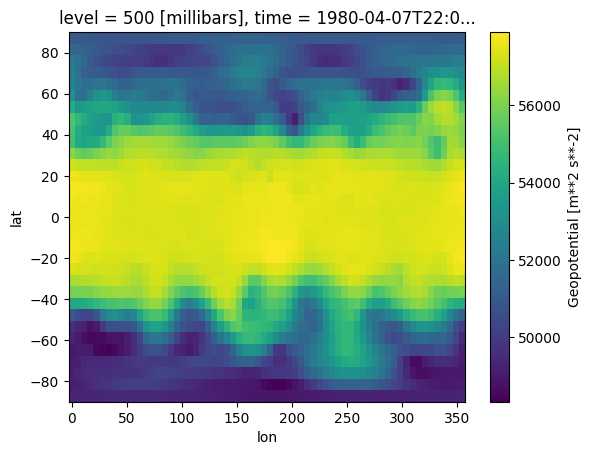

In [5]:
z500.z.isel(time=11110).plot();


In [6]:
climatology = z500.sel(time=slice('2016', '2016')).mean('time').load()


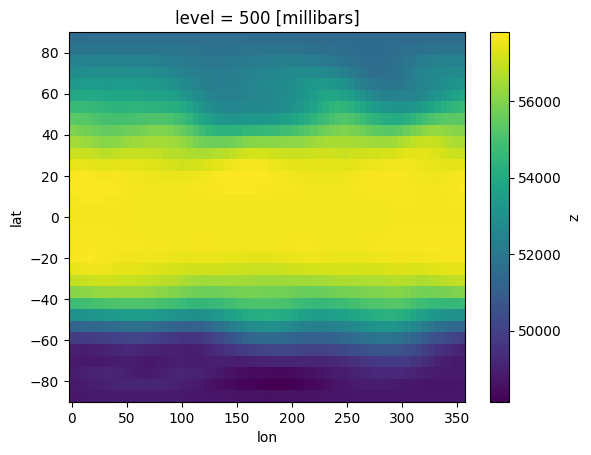

In [7]:
climatology.z.plot()
